In [1]:
%run Munge_Tools.ipynb
%run physiochem_graph_funct.ipynb
%matplotlib inline

function: write_tuples(filename,neworappend,header,tuples)
function: mytups,mydict=csv_to_dict(filenm)
function: mydiccol=TupEnt_to_DictCol(filt_tups,header):
function: mytuprows=DictCol_to_TupEnt(TheDict,YourHeader)


## 1.Get Data

In [2]:
#alpha:  0.773007370105  beta:  0.226521774235  gamma:  0.000470855660247

In [3]:
alphaopt,betaopt,gammaopt=(0.773007370105,0.226521774235,0.000470855660247)
alpha_p,beta_b=(0.77300737,  0.99792568)

In [4]:
fit_gval_tups_full,mydic=csv_to_dict("gvalue_data_frame_LL_68356_January-17-21-46.csv")
fit_gval_tups=[l[0:3] for l in fit_gval_tups_full]
fit_gval_tups=fit_gval_tups[1::]


1. getting ready to open file
2. read file
3. made column dictionary
                


In [5]:
arrf=lambda x:np.array(x,dtype='f')

In [6]:
tpos,tgv,tLL=zip(*fit_gval_tups)
fit_gval=zip(arrf(tpos),arrf(tgv),arrf(tLL))

### FUNCTION TO PLOT HEAT MAP

In [7]:
def Plot_HeatMap_W_Countours(X,Y,Z,the_delta=5,thecolor="blue",CI95=None,savehm=False,point_pairs=None,mylevels=None):
    
    #SET HEAT MAPS=================================================
    ptxtsz=10
    import matplotlib.cm as cm
    heatmapcol=cm.inferno
    alpha_v=0.80
    if thecolor!='blue':
        heatmapcol=cm.gray
        alpha_v=0.80
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    matplotlib.rcParams['xtick.labelsize'] = ptxtsz
    matplotlib.rcParams['ytick.labelsize'] = ptxtsz
    fig=plt.figure(figsize=(10,10), dpi=300)
    plt.xlabel(r'polarity weight $\theta_p$',fontsize=ptxtsz+15)
    plt.ylabel(r'composition weight $\theta_c$',fontsize=ptxtsz+15)
    #==================================================================
    
    if not CI95:
        CI95=np.mean([nanmin(Z),nanmax(Z)])
    #PLOT HEATMAP AND CONTOURS=========================================
    mycoldic={0:'white',1:'yellow',2:'white'}
    if point_pairs:
        for i,points in enumerate(point_pairs):
            plt.scatter(points[0],points[1],color=mycoldic[i],marker='*',s=30)
    im = plt.imshow(Z,origin='lower',alpha=alpha_v,cmap=heatmapcol,extent=[X[0],X[-1],Y[0],Y[-1]],aspect='auto',interpolation='none')
    #---------------------------------------------------------------
    
    if mylevels:
        levels=mylevels
    else:
        levels = list(np.arange(nanmin(Z),CI95-the_delta,the_delta))+list(np.arange(CI95+the_delta,nanmax(Z),the_delta))
        if not CI95:
            levels=np.linspace(nanmin(Z),nanmax(Z),the_delta)
    CS = plt.contour(Z,levels,origin='lower',linewidths=1,colors='k',extent=[X[0],X[-1],Y[0],Y[-1]],aspect='auto')
    #C95 = plt.contour(Z,[CI95],origin='lower',linewidths=1,colors='r',extent=[X[0],X[-1],Y[0],Y[-1]],aspect='auto')
    #-------------------------------------------------------------
    #fmt = {}
    #strs = ['0.95 % CI']
    #for l, s in zip(C95.levels, strs):
    #    fmt[l] = s
    #--------------------------------------------------------------
    #plt.clabel(C95, inline=1, fontsize=ptxtsz,fmt=fmt)
    plt.clabel(CS, inline=1, fontsize=ptxtsz)
    
    #PLOT COLOR BAR ======================================================
    CBI = plt.colorbar(im, orientation='horizontal')#shrink 0.80
    CBI.set_label(r"$-log(\mathcal{L}(\vec{\theta}|X)$", size=ptxtsz+5)
    
    #SAVE GRAPH
    #===============================================================
    =======
    if savehm==True:
        print "saved figure"
        fig.savefig("physiochemfigures/heat_map_weights_LL_68356_PaperVersion.pdf")

In [8]:
def Make_matrix(Alp,Blp):
    test_mat_ab=np.zeros((len(Alp),len(Blp)))
    for ai,a in enumerate(Alp):
        for bj,b in enumerate(Blp):
            if a+b>=1:
                test_mat_ab[ai][bj]=None 
            else:
                bc=float(b)/float((1-a))
                test_mat_ab[ai][bj]=LL_Funct_G([a,bc])  # Bj is (X) and Aj is (Y)
    return test_mat_ab


# 2. Create Heat Map Matrix of alpha and beta weights

In [9]:

Alp1=np.linspace(0,1,100)
Blp1=np.linspace(0,1,100)
Full_Mat=Make_matrix(Alp1,Blp1)


KeyboardInterrupt: 

In [ ]:
the_mat=copy.deepcopy(Full_Mat)
val=nanmin(the_mat)
acoord,bcoord=np.where(the_mat==val)
a_min=float(Alp1[int(acoord)])
b_min=float(Blp1[int(bcoord)])
bc_min=float(b_min)/float((1-a_min))
print "The location of this minimum is",acoord,bcoord
print "The minimal value in this heat maps is at","alpha:",a_min, " beta",b_min, "gamma",1-a_min-b_min
print "The minimal LL in this map is:",val
print "The Likelihood at this Position is:",LL_Funct_G([a_min,bc_min])
print "The Heat map at this position is:",the_mat[int(acoord)][int(bcoord)]

## Plot and Analyze

In [13]:
minval,maxval=(nanmin(the_mat),nanmax(the_mat))
thelevels=np.linspace(minval,maxval,10)

In [14]:
print minval,maxval

219357.655381 1811087.37521


saved figure


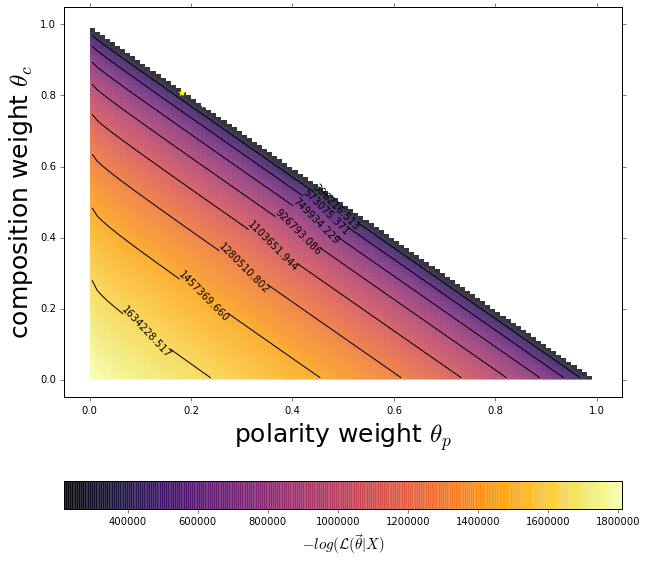

In [15]:
#Plot_HeatMap_W_Countours(Blp1,Alp1,Full_Mat,20,point_pairs=[(0.01,0.99),(b_min,a_min)])
Plot_HeatMap_W_Countours(Blp1,Alp1,Full_Mat,800,point_pairs=[(betaopt,alphaopt),(b_min,a_min)],mylevels=list(thelevels),savehm=True)

# 3. Create Zoomed in View of HeatMap Around Optimum

In [ ]:


# #BEST!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
# a_s=0.0001
# b_s=0.0001
# sz=20
# b_min=0.241
# a_min=0.758207336523 
# Alp_min=np.append(np.linspace(a_min-10*a_s,a_min-a_s,sz),np.linspace(a_min,a_min+10*a_s,sz))
# Blp_min=np.append(np.linspace(b_min-10*b_s,b_min-b_s,sz),np.linspace(b_min,b_min+10*b_s,sz))

# # a_s=0.0001
# # b_s=0.0001
# # sz=20
# # a_min=0.751302073365  
# # b_min=0.247894736842
# # Alp_min=np.append(np.linspace(a_min-30*a_s,a_min-a_s,sz),np.linspace(a_min,a_min+30*a_s,sz))
# Blp_min=np.append(np.linspace(b_min-30*b_s,b_min-b_s,sz),np.linspace(b_min,b_min+30*b_s,sz))

# a_s=0.0001
# b_s=0.0001
# sz=20
# a_min=0.751302073365  
# b_min=0.247894736842
# Alp_min=np.append(np.linspace(a_min-30*a_s,a_min-a_s,sz),np.linspace(a_min,a_min+30*a_s,sz))
# Blp_min=np.append(np.linspace(b_min-30*b_s,b_min-b_s,sz),np.linspace(b_min,b_min+30*b_s,sz))


# tgm=0.0008
# rest=1-tgm
# tbm=rest*0.01
# tam=1-tgm-tbm
# a_s=0.0001
# b_s=0.0001
# sz=20
# a_min=tam  
# b_min=tbm
# Alp_min=np.append(np.linspace(a_min-30*a_s,a_min-a_s,sz),np.linspace(a_min,a_min+30*a_s,sz))
# Blp_min=np.append(np.linspace(b_min-30*b_s,b_min-b_s,sz),np.linspace(b_min,b_min+30*b_s,sz))

#alphaopt,betaopt

# Min_Mat=Make_matrix(Alp_min,Blp_min)

In [ ]:
plt.clf()

In [ ]:
the_mat=copy.deepcopy(Min_Mat)
val=nanmin(the_mat)
acoord,bcoord=np.where(the_mat==val)
a_min_min=float(Alp_min[int(acoord)])
b_min_min=float(Blp_min[int(bcoord)])
bc_min_min=float(b_min_min)/float((1-a_min_min))
print "The location of this minimum is",acoord,bcoord
print "The minimal value in this heat maps is at","alpha:",a_min_min, " beta",b_min_min, "gamma",1-a_min_min-b_min_min
print "The minimal LL in this map is:",val
print "The Likelihood at this Position is:",LL_Funct_G([a_min_min,bc_min_min])
print "The Heat map at this position is:",the_mat[int(acoord)][int(bcoord)]

In [ ]:
minLL_lev=LL_Funct_G([a_min_min,bc_min_min])
the_lev=[minLL_lev+a for a in [100]]

In [ ]:
minLL_lev

In [ ]:
Plot_HeatMap_W_Countours(Blp_min,Alp_min,Min_Mat,5,point_pairs=[(b_min,a_min),(b_min_min,a_min_min)],mylevels=the_lev)